In [1]:
import  pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'D:\New folder (2)\Data\ai_job_market_insights.csv')

In [3]:
data.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [4]:
data.tail()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable
499,HR Manager,Entertainment,Medium,Berlin,Medium,High,Project Management,68764.378921,Yes,Decline


In [5]:
data.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


In [6]:
data.shape

(500, 10)

In [7]:
data.isnull().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
# 1. Identify high-demand job roles and skills
job_title_counts = data['Job_Title'].value_counts()
skills_counts = data['Required_Skills'].value_counts()
job_title_counts.head()

Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Name: count, dtype: int64

In [10]:
skills_counts.head()

Required_Skills
Python                60
Project Management    60
Cybersecurity         58
Machine Learning      52
Data Analysis         49
Name: count, dtype: int64

In [11]:
# 2. Salary trends by industry, location, and job title
salary_by_industry = data.groupby('Industry')['Salary_USD'].mean().sort_values(ascending=False)
salary_by_location = data.groupby('Location')['Salary_USD'].mean().sort_values(ascending=False)
salary_by_job_title = data.groupby('Job_Title')['Salary_USD'].mean().sort_values(ascending=False)

In [12]:
salary_by_industry.head()

Industry
Finance          94355.465599
Entertainment    94291.233910
Education        93798.521907
Energy           92763.939416
Healthcare       91688.504404
Name: Salary_USD, dtype: float64

In [13]:
salary_by_location.head()

Location
New York     93780.426497
Singapore    93739.807016
Berlin       93240.368944
Tokyo        92896.553862
Paris        92116.473572
Name: Salary_USD, dtype: float64

In [14]:
salary_by_job_title.head()

Job_Title
Operations Manager      96937.230841
AI Researcher           95583.346966
Sales Manager           92926.644659
Data Scientist          91480.756134
Marketing Specialist    90961.147148
Name: Salary_USD, dtype: float64

In [15]:
# 3. Remote-friendly opportunities and their correlation with salary
remote_salary_comparison = data.groupby('Remote_Friendly')['Salary_USD'].mean()
remote_salary_comparison

Remote_Friendly
No     90746.868994
Yes    91694.123935
Name: Salary_USD, dtype: float64

In [16]:
# 4. Job growth projections analysis
growth_projection_counts = data['Job_Growth_Projection'].value_counts()
growth_projection_counts

Job_Growth_Projection
Growth     169
Decline    169
Stable     162
Name: count, dtype: int64

In [17]:
# 5. Relationship between AI adoption levels and automation risks
ai_automation_risk = data.groupby(['AI_Adoption_Level', 'Automation_Risk']).size().unstack()
ai_automation_risk

Automation_Risk,High,Low,Medium
AI_Adoption_Level,,,
High,48,43,56
Low,53,61,60
Medium,68,54,57


In [18]:
# Set plot style
sns.set_theme(style="whitegrid")

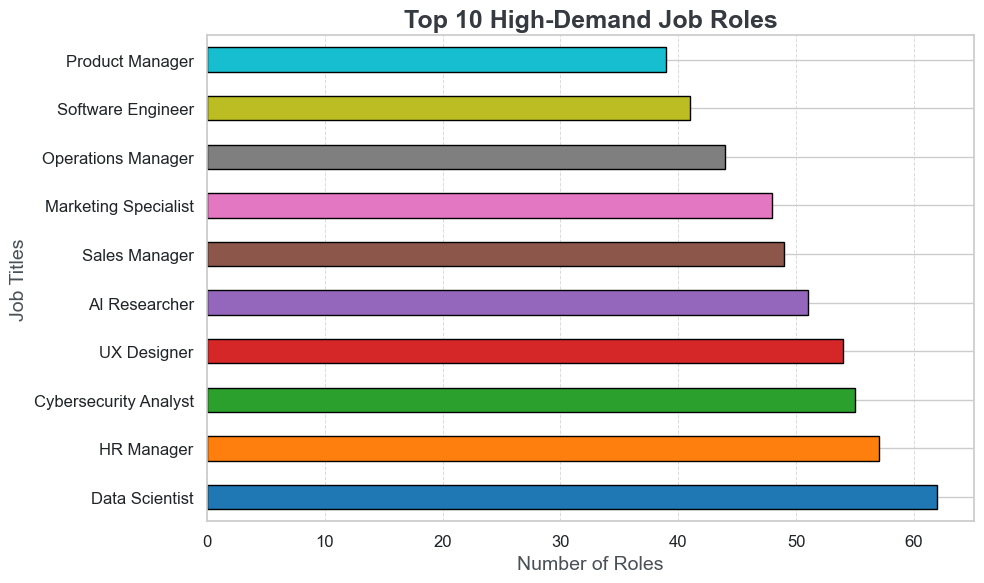

In [20]:
plt.figure(figsize=(10, 6))
job_title_counts.head(10).plot(
    kind='barh', 
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'],
    edgecolor='black'
)
plt.title("Top 10 High-Demand Job Roles", fontsize=18, fontweight='bold', color='#343a40')
plt.xlabel("Number of Roles", fontsize=14, color='#495057')
plt.ylabel("Job Titles", fontsize=14, color='#495057')
plt.xticks(fontsize=12, color='#212529')
plt.yticks(fontsize=12, color='#212529')
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

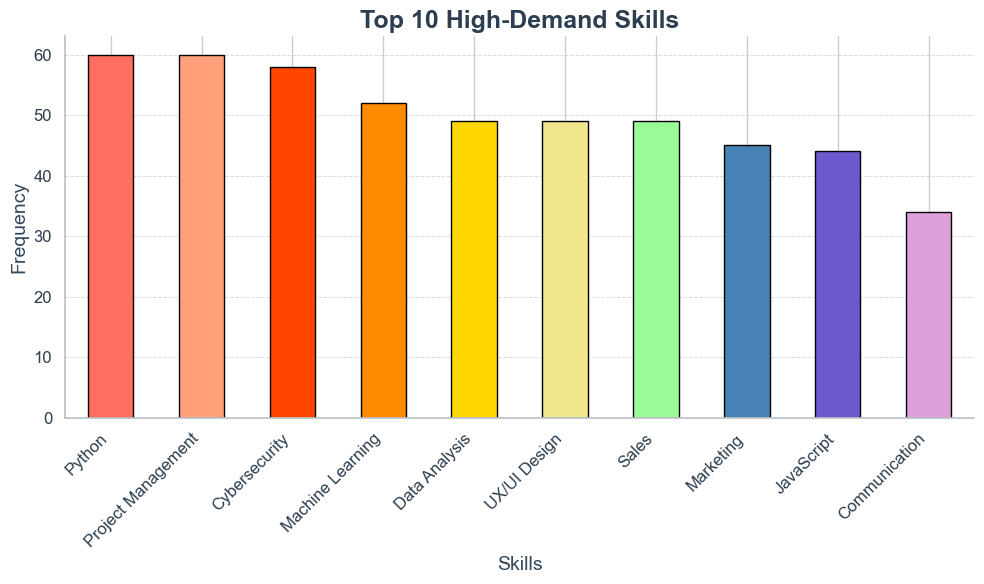

In [21]:
plt.figure(figsize=(10, 6))
skills_counts.head(10).plot(
    kind='bar', 
    color=['#ff6f61', '#ffa07a', '#ff4500', '#ff8c00', '#ffd700', '#f0e68c', '#98fb98', '#4682b4', '#6a5acd', '#dda0dd'], 
    edgecolor='black'
)
plt.title("Top 10 High-Demand Skills", fontsize=18, fontweight='bold', color='#2c3e50')
plt.ylabel("Frequency", fontsize=14, color='#34495e')
plt.xlabel("Skills", fontsize=14, color='#34495e')
plt.xticks(rotation=45, ha='right', fontsize=12, color='#2c3e50')
plt.yticks(fontsize=12, color='#2c3e50')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adding a frame around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#bdc3c7')
plt.gca().spines['bottom'].set_color('#bdc3c7')

plt.tight_layout()
plt.show()

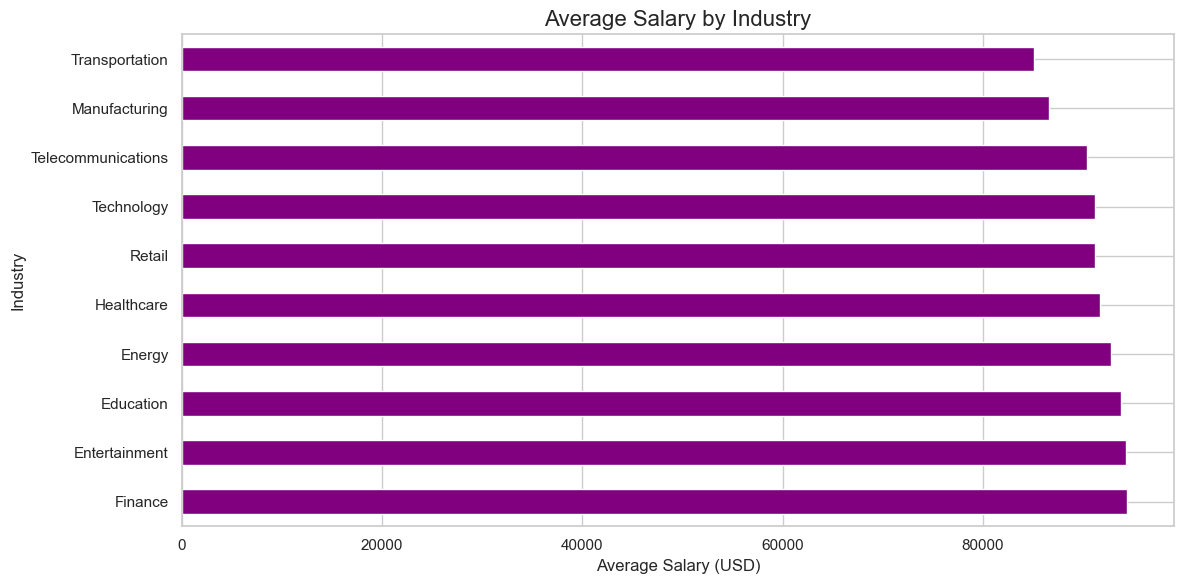

In [65]:
# 3. Salary trends by industry
plt.figure(figsize=(12, 6))
salary_by_industry.plot(kind='barh', color='purple')
plt.title("Average Salary by Industry", fontsize=16)
plt.xlabel("Average Salary (USD)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

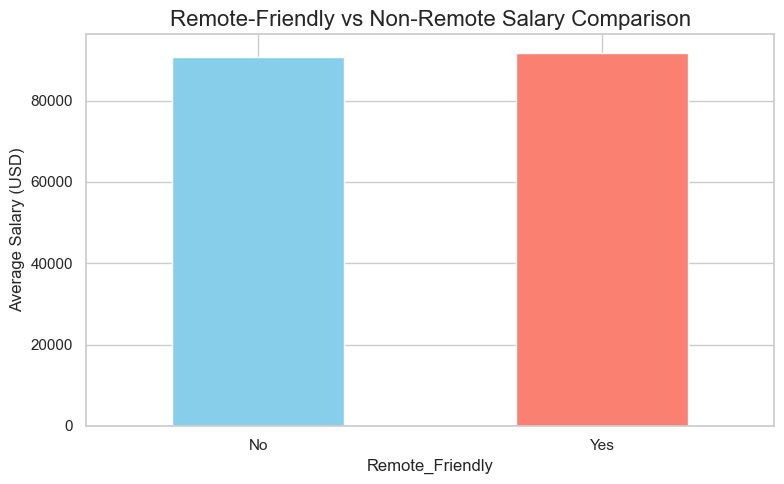

In [66]:
# 4. Remote vs Non-Remote Salary Comparison
plt.figure(figsize=(8, 5))
remote_salary_comparison.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Remote-Friendly vs Non-Remote Salary Comparison", fontsize=16)
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

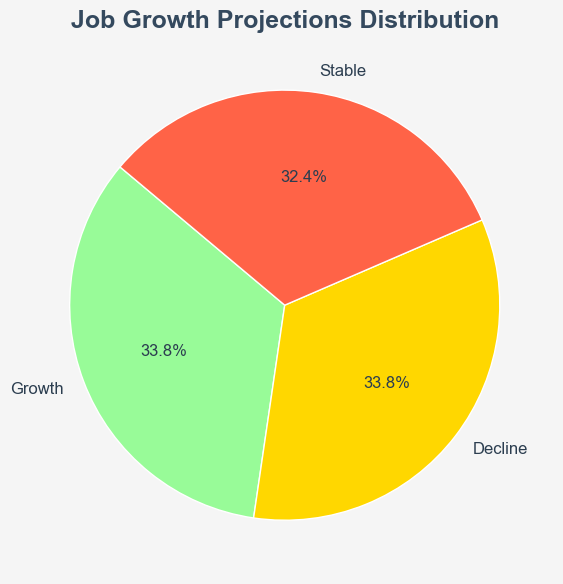

In [24]:
plt.figure(figsize=(8, 6), facecolor='#f5f5f5')  # Adding a background color
plt.gca().set_facecolor('#eaeaea')  # Adding a subtle inner background color

# Enhanced pie chart
growth_projection_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=['#98FB98', '#FFD700', '#FF6347'],  # Soft and vibrant colors
    textprops={'fontsize': 12, 'color': '#2c3e50'}  # Stylish text
)

# Title customization
plt.title("Job Growth Projections Distribution", fontsize=18, fontweight='bold', color='#34495e')
plt.ylabel('')  # Remove default ylabel
plt.tight_layout()

# Adding a circular frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display
plt.show()

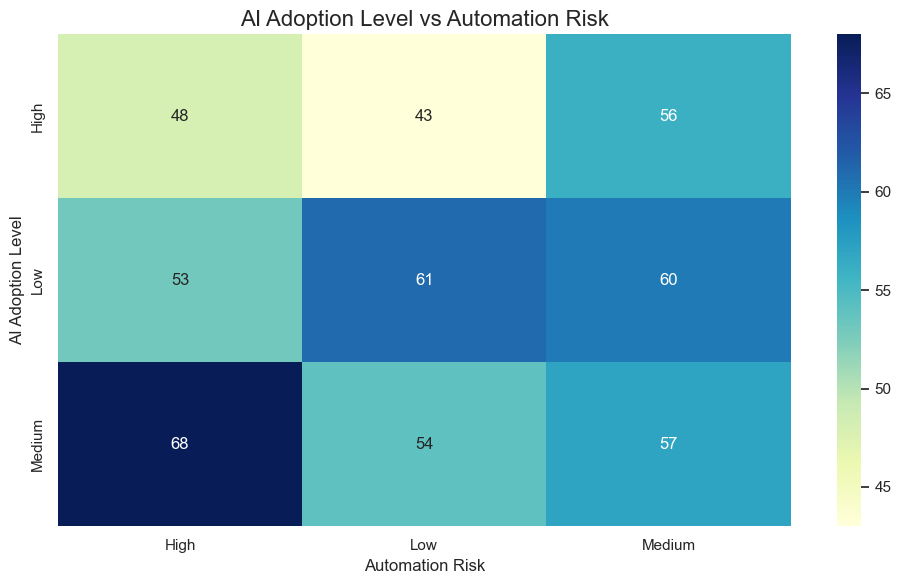

In [44]:
# 6. AI Adoption Level vs Automation Risk Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ai_automation_risk, annot=True, fmt="d", cmap="YlGnBu")
plt.title("AI Adoption Level vs Automation Risk", fontsize=16)
plt.ylabel("AI Adoption Level")
plt.xlabel("Automation Risk")
plt.tight_layout()
plt.show()

In [26]:
#Industries with Growth Potential
growth_industries = data[data['Job_Growth_Projection'] == 'Growth'].groupby('Industry').size().sort_values(ascending=False)

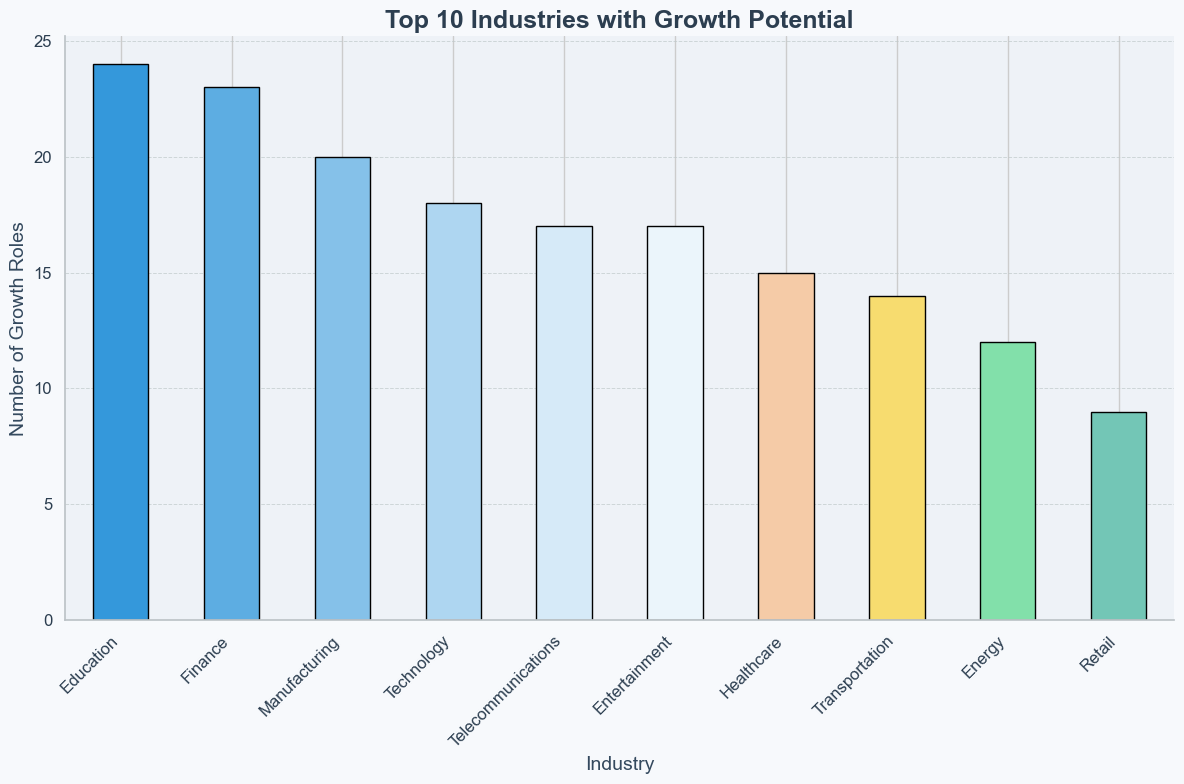

In [28]:
plt.figure(figsize=(12, 8), facecolor='#f7f9fc')  # Outer background color
ax = plt.gca()
ax.set_facecolor('#eef2f7')  # Inner background color

growth_industries.head(10).plot(
    kind='bar', 
    color=['#3498db', '#5dade2', '#85c1e9', '#aed6f1', '#d6eaf8', '#ebf5fb', '#f5cba7', '#f7dc6f', '#82e0aa', '#73c6b6'], 
    edgecolor='black'
)

# Title and axis labels
plt.title("Top 10 Industries with Growth Potential", fontsize=18, fontweight='bold', color='#2c3e50')
plt.ylabel("Number of Growth Roles", fontsize=14, color='#34495e')
plt.xlabel("Industry", fontsize=14, color='#34495e')

# Ticks customization
plt.xticks(rotation=45, ha='right', fontsize=12, color='#2c3e50')
plt.yticks(fontsize=12, color='#2c3e50')

# Grid customization
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7, color='#bfc9ca')

# Frame adjustments for modern look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#bdc3c7')
ax.spines['bottom'].set_color('#bdc3c7')

# Adding space around the layout
plt.tight_layout()

plt.show()

In [29]:
#Skill-Gap Analysis: Compare frequently vs. infrequently mentioned skills
skill_counts_sorted = data['Required_Skills'].value_counts()
low_demand_skills = skill_counts_sorted.tail(10)

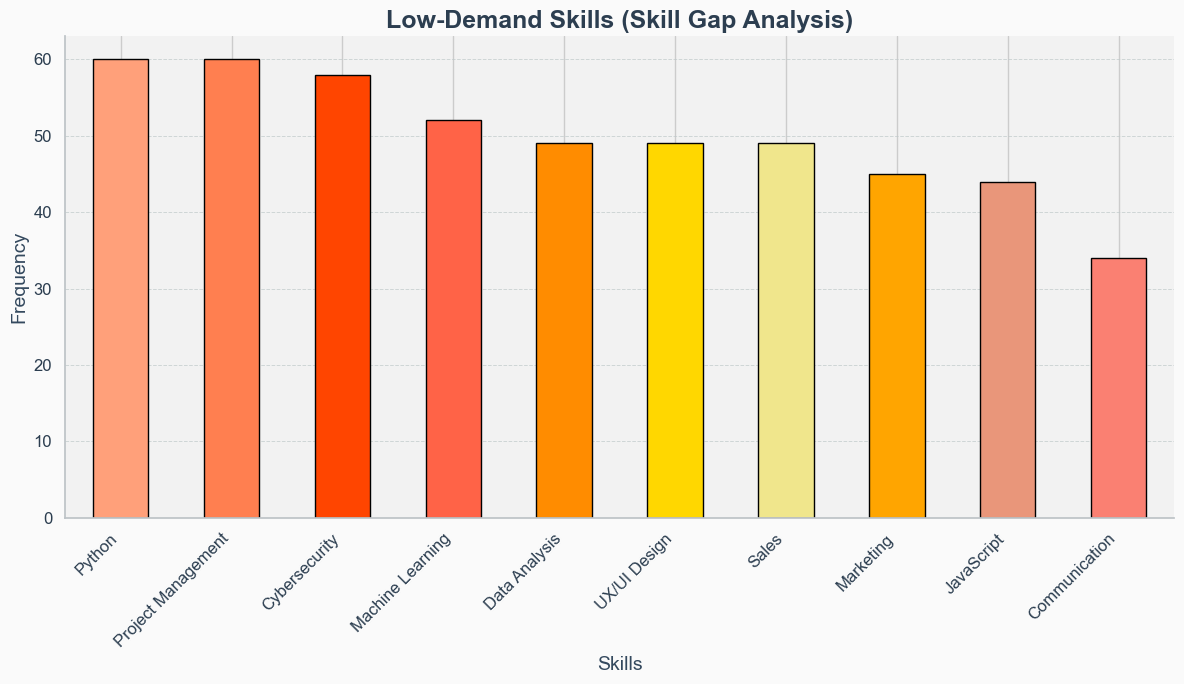

In [30]:
plt.figure(figsize=(12, 7), facecolor='#fafafa')  # Outer background
ax = plt.gca()
ax.set_facecolor('#f2f2f2')  # Inner plot background

low_demand_skills.plot(
    kind='bar', 
    color=['#ffa07a', '#ff7f50', '#ff4500', '#ff6347', '#ff8c00', '#ffd700', '#f0e68c', '#ffa500', '#e9967a', '#fa8072'], 
    edgecolor='black'
)

# Title and axis labels
plt.title("Low-Demand Skills (Skill Gap Analysis)", fontsize=18, fontweight='bold', color='#2c3e50')
plt.ylabel("Frequency", fontsize=14, color='#34495e')
plt.xlabel("Skills", fontsize=14, color='#34495e')

# Ticks customization
plt.xticks(rotation=45, ha='right', fontsize=12, color='#2c3e50')
plt.yticks(fontsize=12, color='#2c3e50')

# Grid customization
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7, color='#bfc9ca')

# Frame refinements
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#bdc3c7')
ax.spines['bottom'].set_color('#bdc3c7')

# Adding space around the layout
plt.tight_layout()

plt.show()

In [32]:
#Salary Ranges for Growth-Oriented Roles
growth_roles_salary = data[data['Job_Growth_Projection'] == 'Growth'].groupby('Job_Title')['Salary_USD'].mean().sort_values(ascending=False)

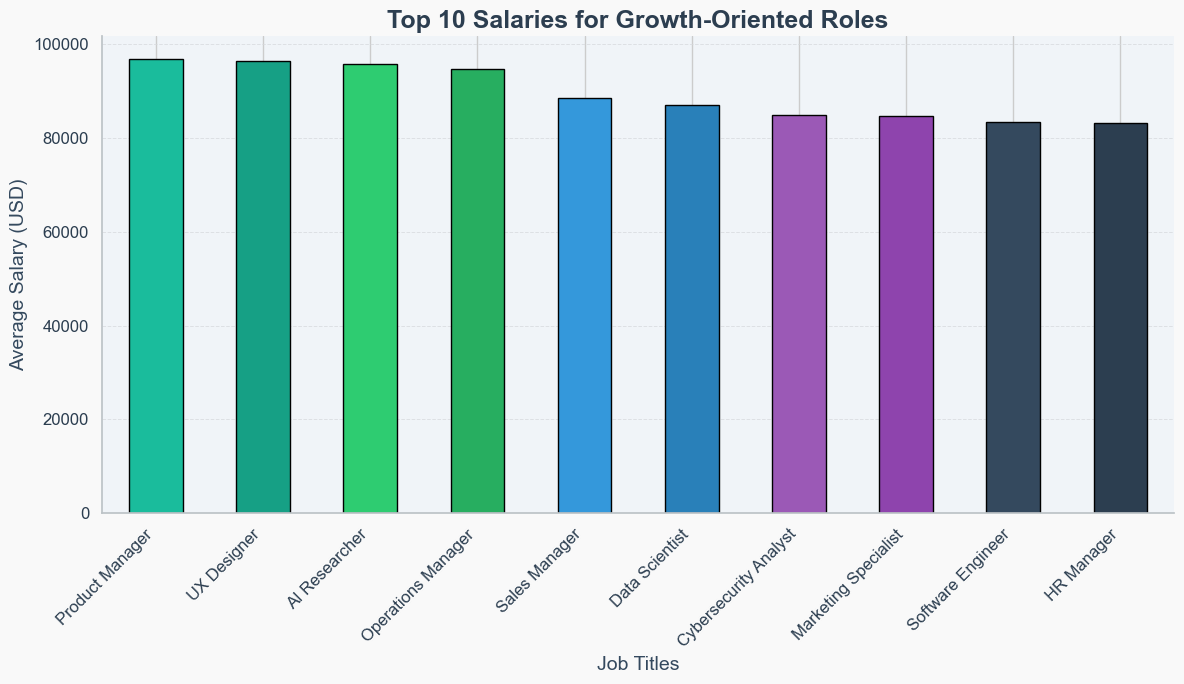

In [33]:
plt.figure(figsize=(12, 7), facecolor='#f9f9f9')  # Outer background color
ax = plt.gca()
ax.set_facecolor('#f0f4f8')  # Inner plot background color

growth_roles_salary.head(10).plot(
    kind='bar', 
    color=['#1abc9c', '#16a085', '#2ecc71', '#27ae60', '#3498db', '#2980b9', '#9b59b6', '#8e44ad', '#34495e', '#2c3e50'], 
    edgecolor='black'
)

# Title and axis labels
plt.title("Top 10 Salaries for Growth-Oriented Roles", fontsize=18, fontweight='bold', color='#2c3e50')
plt.ylabel("Average Salary (USD)", fontsize=14, color='#34495e')
plt.xlabel("Job Titles", fontsize=14, color='#34495e')

# Ticks customization
plt.xticks(rotation=45, ha='right', fontsize=12, color='#2c3e50')
plt.yticks(fontsize=12, color='#2c3e50')

# Grid customization
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7, color='#d5d8dc')

# Frame adjustments
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#bdc3c7')
ax.spines['bottom'].set_color('#bdc3c7')

# Adding space around the layout
plt.tight_layout()

plt.show()

In [34]:
#Top Locations for High-Demand Roles
high_demand_roles = data['Job_Title'].value_counts().head(5).index  # Top 5 roles
top_locations_high_demand = data[data['Job_Title'].isin(high_demand_roles)].groupby('Location').size().sort_values(ascending=False)

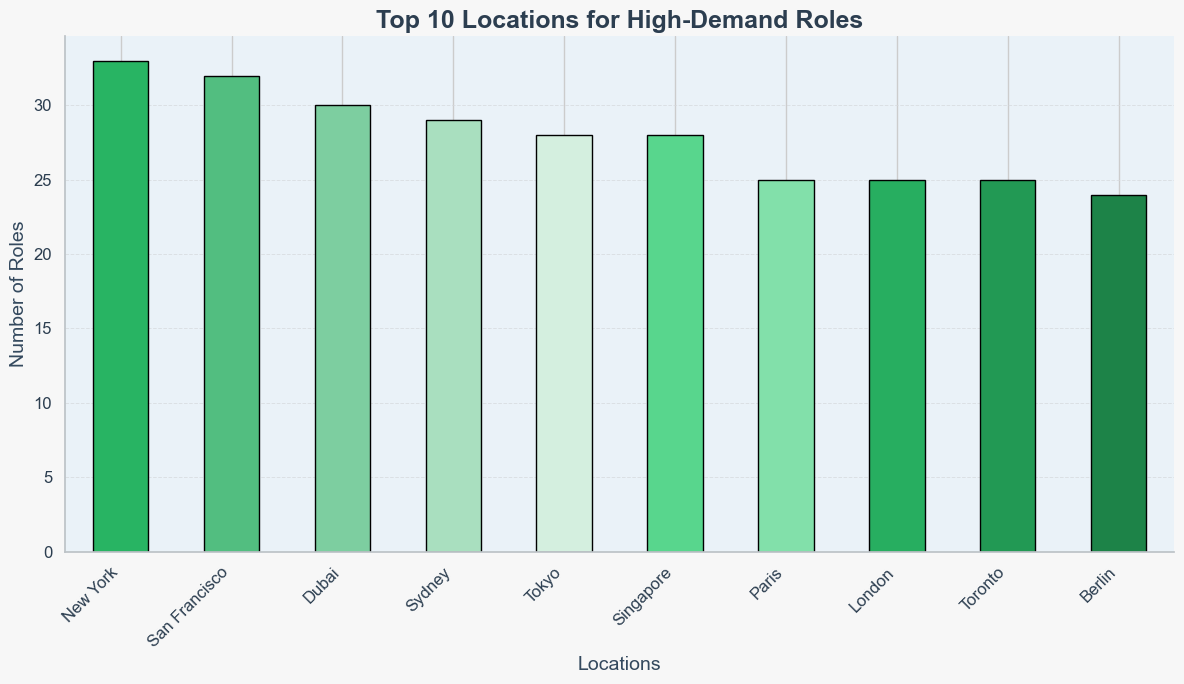

In [35]:
plt.figure(figsize=(12, 7), facecolor='#f7f7f7')  # Outer background color
ax = plt.gca()
ax.set_facecolor('#eaf2f8')  # Inner plot background color

top_locations_high_demand.head(10).plot(
    kind='bar',
    color=['#28b463', '#52be80', '#7dcea0', '#a9dfbf', '#d4efdf', '#58d68d', '#82e0aa', '#27ae60', '#229954', '#1d8348'],
    edgecolor='black'
)

# Title and axis labels
plt.title("Top 10 Locations for High-Demand Roles", fontsize=18, fontweight='bold', color='#2c3e50')
plt.ylabel("Number of Roles", fontsize=14, color='#34495e')
plt.xlabel("Locations", fontsize=14, color='#34495e')

# Ticks customization
plt.xticks(rotation=45, ha='right', fontsize=12, color='#2c3e50')
plt.yticks(fontsize=12, color='#2c3e50')

# Grid customization
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7, color='#d5d8dc')

# Frame adjustments for modern look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#bdc3c7')
ax.spines['bottom'].set_color('#bdc3c7')

# Adjust layout
plt.tight_layout()

plt.show()

In [36]:
# High Automation Risk Roles Analysis
high_risk_roles = data[data['Automation_Risk'] == 'High'].groupby('Job_Title').size().sort_values(ascending=False)

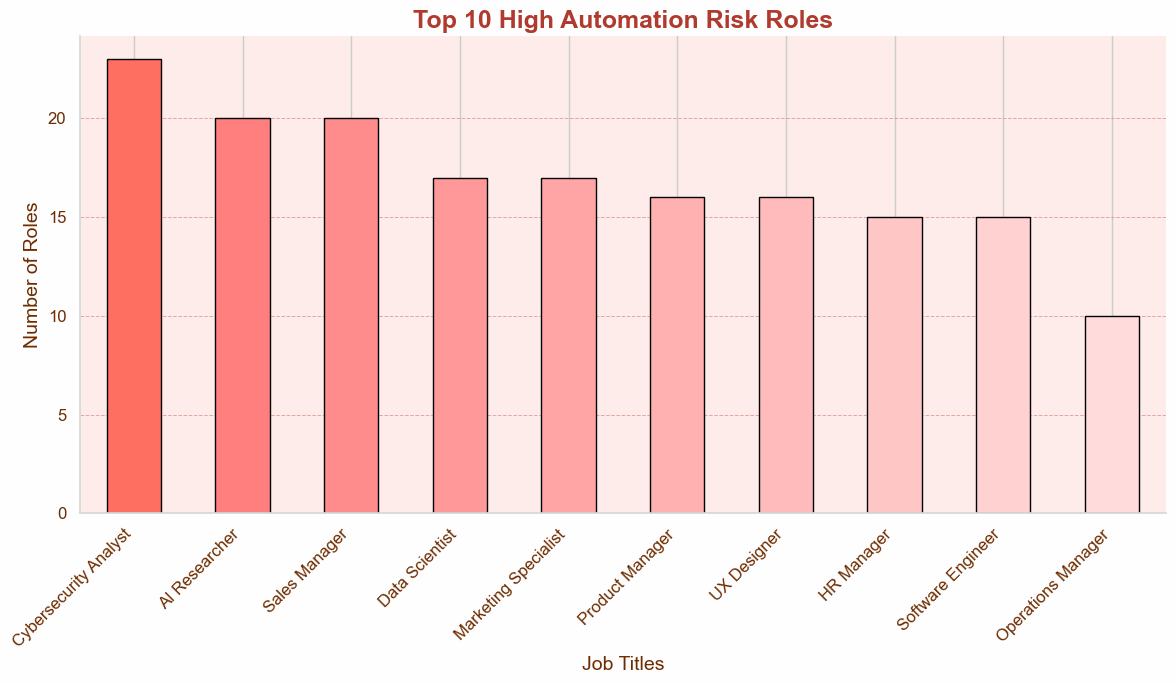

In [37]:
plt.figure(figsize=(12, 7), facecolor='#fefefe')  # Outer background color
ax = plt.gca()
ax.set_facecolor('#fdecea')  # Inner plot background color

high_risk_roles.head(10).plot(
    kind='bar',
    color=['#ff6f61', '#ff7f7f', '#ff8c8c', '#ff9999', '#ffa5a5', '#ffb0b0', '#ffbbbb', '#ffc6c6', '#ffd1d1', '#ffdbdb'],
    edgecolor='black'
)

# Title and axis labels
plt.title("Top 10 High Automation Risk Roles", fontsize=18, fontweight='bold', color='#b03a2e')
plt.ylabel("Number of Roles", fontsize=14, color='#6e2c00')
plt.xlabel("Job Titles", fontsize=14, color='#6e2c00')

# Ticks customization
plt.xticks(rotation=45, ha='right', fontsize=12, color='#6e2c00')
plt.yticks(fontsize=12, color='#6e2c00')

# Grid customization
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7, color='#d98880')

# Frame adjustments for modern look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#d5d8dc')
ax.spines['bottom'].set_color('#d5d8dc')

# Adjust layout
plt.tight_layout()

plt.show()

In [38]:
# Remote Work Industry Analysis
remote_industries = data[data['Remote_Friendly'] == 'Yes'].groupby('Industry').size().sort_values(ascending=False)

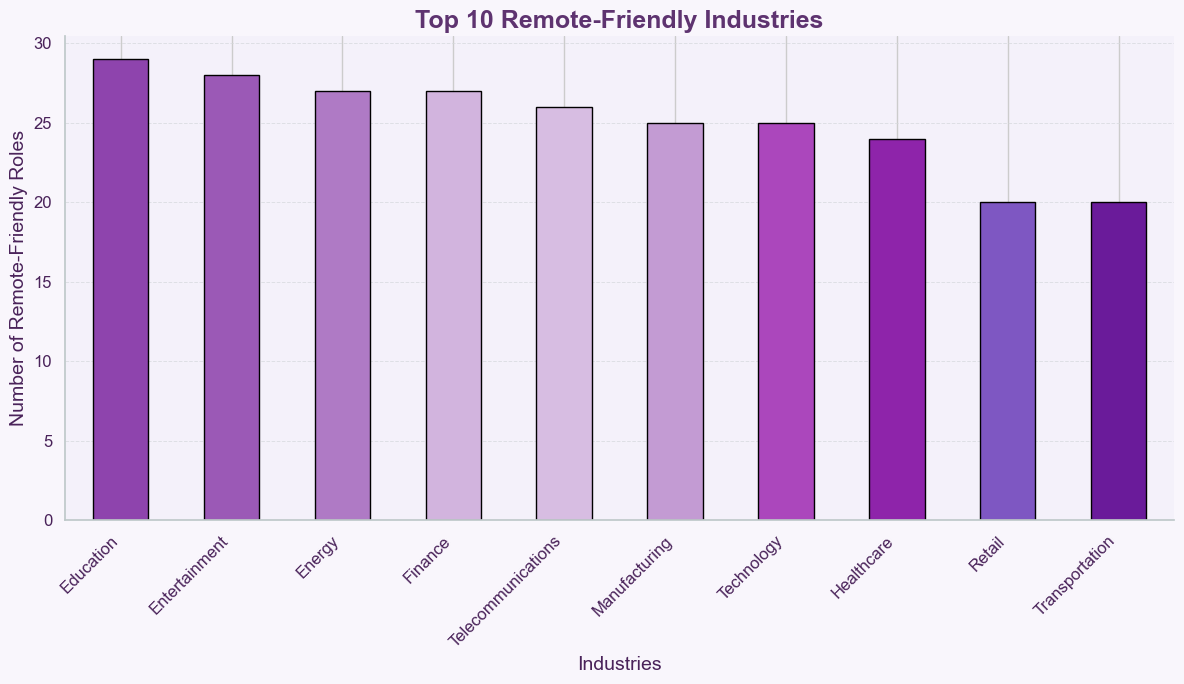

In [39]:
plt.figure(figsize=(12, 7), facecolor='#f9f6fc')  # Outer background color
ax = plt.gca()
ax.set_facecolor('#f4f1fa')  # Inner plot background color

remote_industries.head(10).plot(
    kind='bar',
    color=['#8e44ad', '#9b59b6', '#af7ac5', '#d2b4de', '#d7bde2', '#c39bd3', '#ab47bc', '#8e24aa', '#7e57c2', '#6a1b9a'],
    edgecolor='black'
)

# Title and axis labels
plt.title("Top 10 Remote-Friendly Industries", fontsize=18, fontweight='bold', color='#5e3370')
plt.ylabel("Number of Remote-Friendly Roles", fontsize=14, color='#4a235a')
plt.xlabel("Industries", fontsize=14, color='#4a235a')

# Ticks customization
plt.xticks(rotation=45, ha='right', fontsize=12, color='#4a235a')
plt.yticks(fontsize=12, color='#4a235a')

# Grid customization
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7, color='#d5d8dc')

# Frame adjustments for modern look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#bfc9ca')
ax.spines['bottom'].set_color('#bfc9ca')

# Adjust layout
plt.tight_layout()

plt.show()